## HDDM Analysis of behavioural data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import hddm
print (hddm.__version__)

0.6.0


C:\Users\juhoffmann\Anaconda3\envs\hddm_analysis\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


 ## Variables of a drift diffusion model
 
 threshold `a` A lower threshold makes responding faster in general but increases the influence of noise on decision making and can hence lead to errors or impulsive choice, whereas a higher threshold leads to more cautious responding (slower, more skewed RT distributions, but more accurate)
 
 variability of threshold `a_std`
 
 individual subject parameters `a_subj.EMOCON001`
 
 drift rate `v` The speed with which the accumulation process approaches one of the two boundaries is called drift-rate v and represents the relative evidence for or against a particular response. Because there is noise in the drift process, the time of the boundary crossing and the selected response will vary between trials.
 
 variability of drift rate `v_std`
 
 bias `z` bias z affecting the starting point of the drift process relative to the two boundaries

 non-decision time `t`
 
![Image of Yaktocat](https://www.researchgate.net/profile/Mikkel_Vinding/publication/329577163/figure/fig2/AS:703345597640704@1544702066294/Illustration-of-a-drift-diffusion-model-DDM-to-model-reaction-times-in-two-choice.ppm)



Der Effekt der trialübergreifenden Variabilität in der Nicht-Entscheidungskomponente hängt vom Mittelwert der Driftrate ab (Ratcliff & Tuerlinckx, 2002). Bei großen Werten der Driftrate bewirkt die Variabilität in der Nicht-Entscheidungskomponente eine Verschiebung der Vorderkante der RT-Verteilung um bis zu 10 % von st. Bei kleineren Werten der Driftrate ist der Effekt geringer. 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2474742/


In the simulations in Figure 2, a higher drift rate produces faster and more accurate responses (top simulation), while a lower drift rate produces slower and less accurate responses (second simulation)

In [3]:
#data = hddm.load_csv('/Users/julia/OneDrive - Uniklinik RWTH Aachen/Auswertung/Pilot2/AllConditioins/SecondLevel/hddm_data.csv')
data = hddm.load_csv('')

data = data.drop(['Unnamed: 0'], axis=1)
data = data.dropna(subset=['rt']) #delete NAN
data.head(10)

,subj_idx,rt,response,stim,level,real_trial_number,trial,block,conditions
0,EmoCon002,0.882655,neutral,neutral,8ms,246.0,5.0,3.0,8ms_neutral
1,EmoCon002,0.615015,neutral,neutral,8ms,247.0,6.0,3.0,8ms_neutral
2,EmoCon002,0.546029,neutral,neutral,8ms,248.0,7.0,3.0,8ms_neutral
3,EmoCon002,1.177777,happy,neutral,8ms,253.0,12.0,3.0,8ms_neutral
4,EmoCon002,1.255196,sad,happy,8ms,256.0,15.0,3.0,8ms_happy
5,EmoCon002,0.864299,sad,sad,8ms,259.0,18.0,3.0,8ms_sad
6,EmoCon002,0.810783,neutral,neutral,8ms,261.0,20.0,3.0,8ms_neutral
7,EmoCon002,0.889715,neutral,sad,8ms,262.0,21.0,3.0,8ms_sad
8,EmoCon002,0.682651,happy,happy,8ms,264.0,23.0,3.0,8ms_happy
9,EmoCon002,0.813204,happy,happy,8ms,266.0,25.0,3.0,8ms_happy


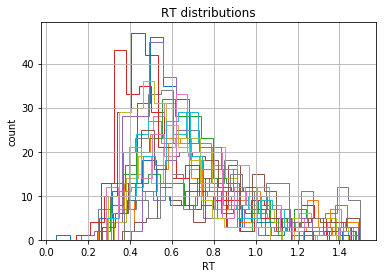

In [6]:
data = hddm.utils.flip_errors(data)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('figures/hddm_RT_distribution.pdf')

# Analyse Model Conditions
## Gelman Rubin R Statistic
### Drift Rate

In [76]:
models = list()
for i in range(5):
    m = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'conditions'})    
    m.find_starting_values()
    m.sample(100000, burn=500, thin=5) 
    models.append(m)
hddm.analyze.gelman_rubin(models)

 [-----------------100%-----------------] 100000 of 100000 complete in 8790.0 secc

{'a': 1.0088593477741508,
 'a_std': 1.0002487171938563,
 'a_subj.EMOCONPILOT001': 1.0100315014098271,
 'a_subj.EMOCONPILOT003': 1.0073384979504887,
 'a_subj.EMOCONPILOT004': 1.0041961582134302,
 'a_subj.EMOCONPILOT005_120HZ': 1.0078991880302521,
 'a_subj.EMOCONPILOT006': 1.00075039197863,
 'a_subj.EMOCONPILOT007': 1.004610646028301,
 'a_subj.EMOCONPILOT008': 1.0066999056290573,
 'a_subj.EMOCONPILOT009': 1.007616100291872,
 'a_subj.EMOCONPILOT010': 1.0059166696012065,
 'a_subj.EMOCONPILOT011': 1.0102434656624177,
 'a_subj.EMOCONPILOT014': 1.0056053701535883,
 'a_subj.EMOCONPILOT015': 1.0069566520420519,
 'a_subj.EMOCONPILOT016': 1.006460768964535,
 'a_subj.EMOCONPILOT017': 1.0095440356958636,
 'a_subj.EMOCONPILOT018': 1.0065630496939446,
 'a_subj.EMOCONPILOT020': 1.0060628598296804,
 'a_subj.EMOCONPILOT021': 1.0099711359037924,
 'a_subj.EMOCONPILOT022': 1.0057129700001506,
 'a_subj.EMOCONPILOT024': 1.0007132248297324,
 'a_subj.EmoCon002': 1.007440911422318,
 't': 1.0084818326917535,
 't

Plotting a
Plotting a_std
Plotting v(141ms_happy)
Plotting v(141ms_neutral)
Plotting v(141ms_sad)
Plotting v(16ms_happy)
Plotting v(16ms_neutral)
Plotting v(16ms_sad)
Plotting v(25ms_happy)
Plotting v(25ms_neutral)
Plotting v(25ms_sad)
Plotting v(8ms_happy)
Plotting v(8ms_neutral)
Plotting v(8ms_sad)
Plotting v_std
Plotting t
Plotting t_std


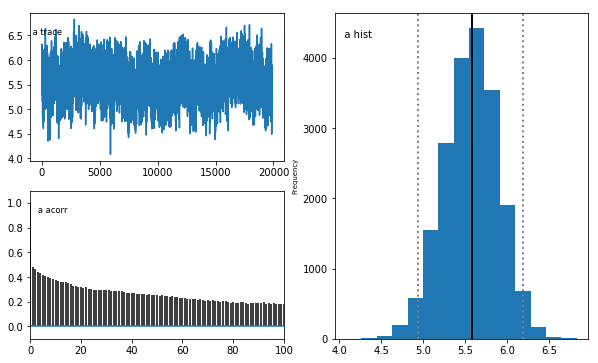

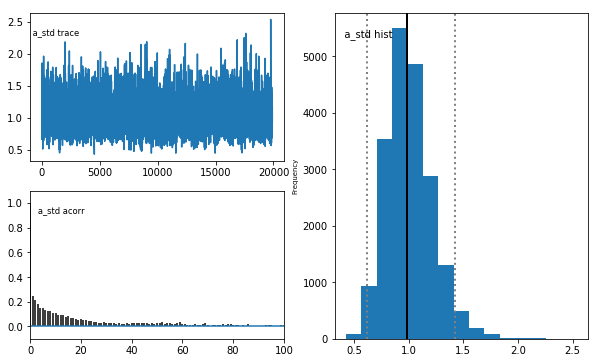

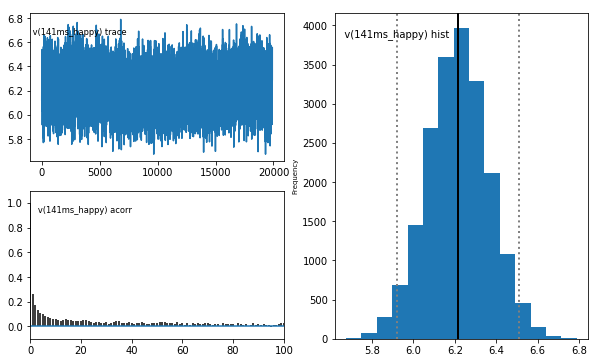

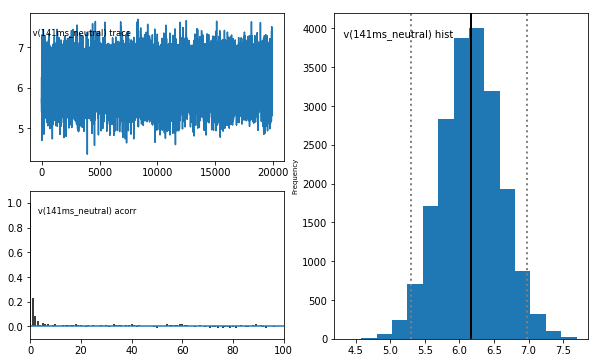

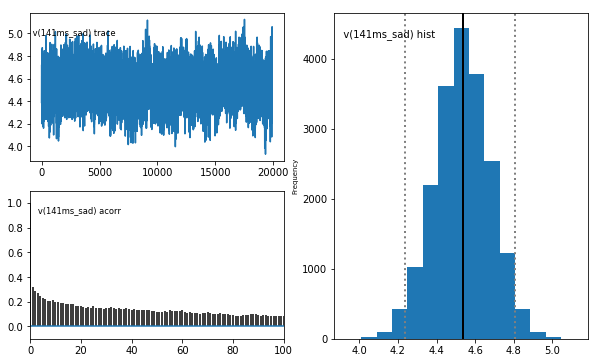

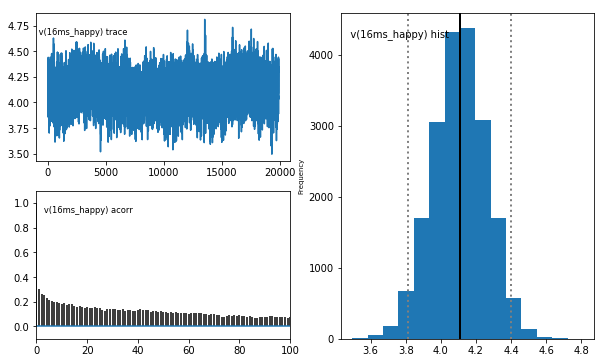

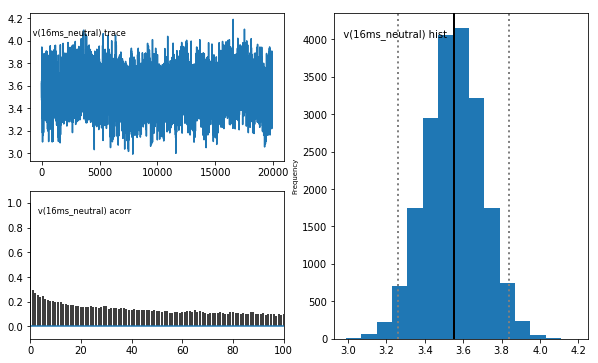

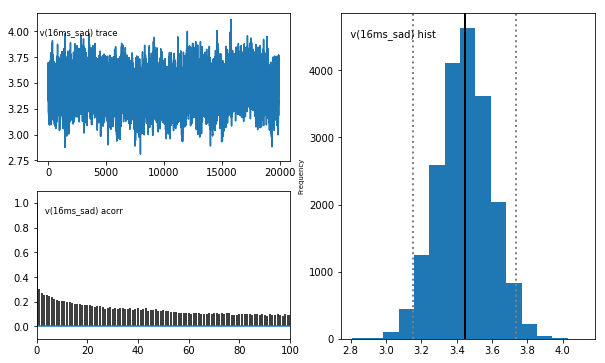

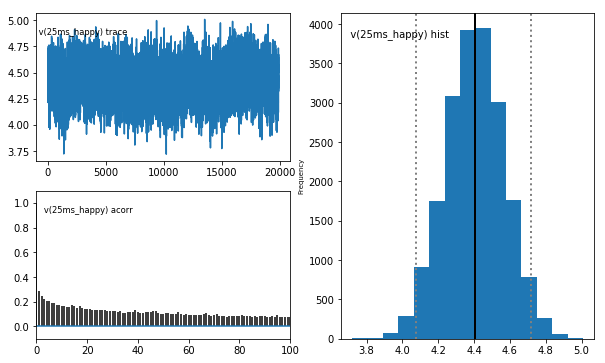

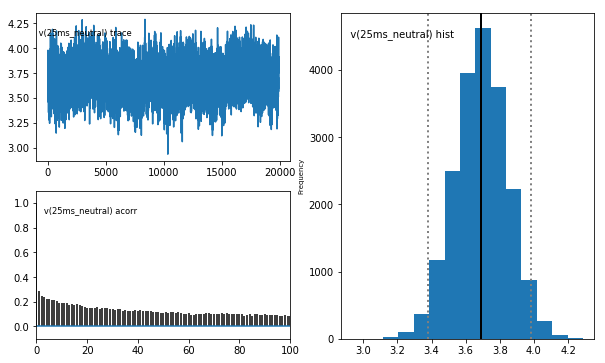

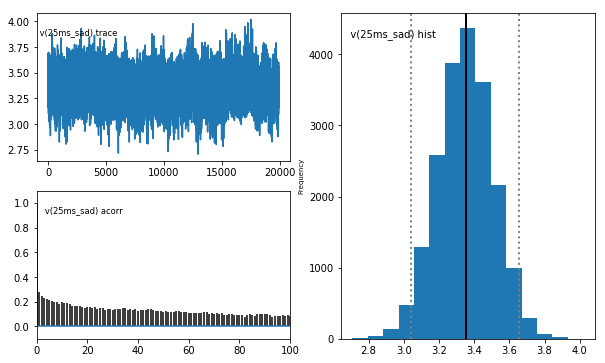

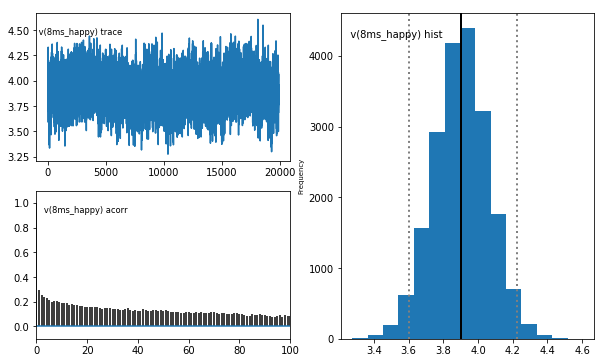

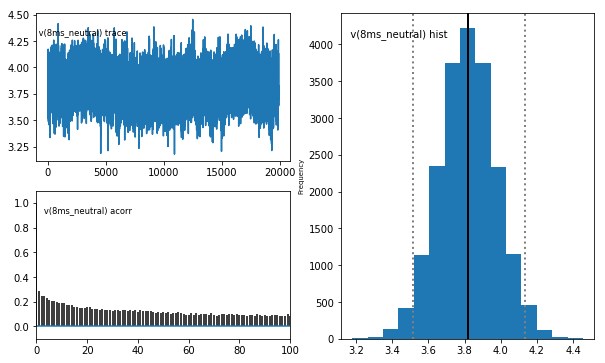

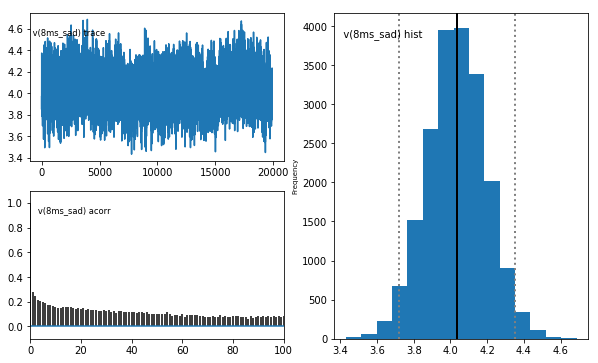

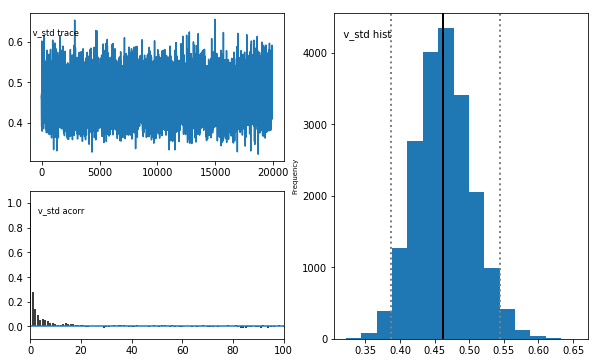

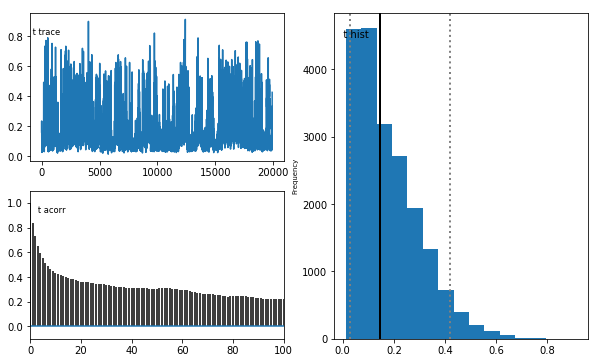

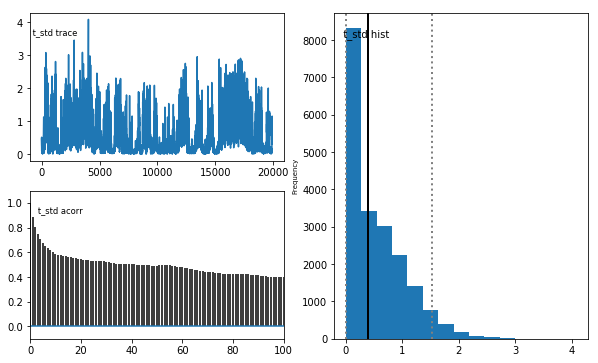

In [77]:
m.plot_posteriors()

In [78]:
m.print_stats()

                                                  mean        std         2.5q          25q          50q         75q      97.5q       mc err
a                                              5.56747   0.320864      4.92222      5.35301      5.57868        5.79    6.17187    0.0159571
a_std                                          1.00921   0.210765     0.660479     0.861623     0.987418     1.13112    1.48061   0.00412141
a_subj.EMOCONPILOT001                          4.85778   0.451288      3.96405      4.51342      4.88749      5.2363    5.57643    0.0216646
a_subj.EMOCONPILOT003                          6.57281   0.447065       5.5447      6.29906      6.66282     6.89735    7.24594    0.0222983
a_subj.EMOCONPILOT004                          5.79569   0.284012      5.15069      5.63486      5.81804     5.98912    6.29067    0.0116982
a_subj.EMOCONPILOT005_120HZ                    5.48687   0.331636      4.67138      5.31793      5.55138     5.71637    5.98513    0.0169339
a_subj.EMOCON

# Draw All Conditions Drift Rate

In [79]:
import matplotlib.pyplot

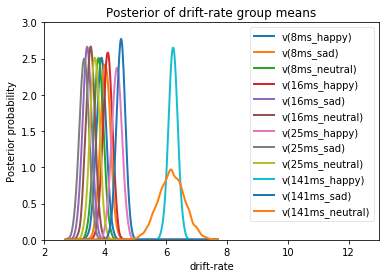

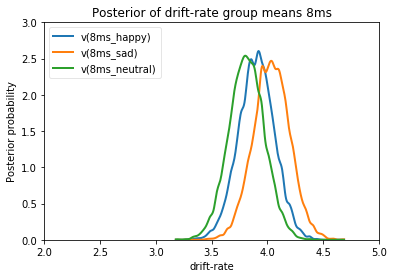

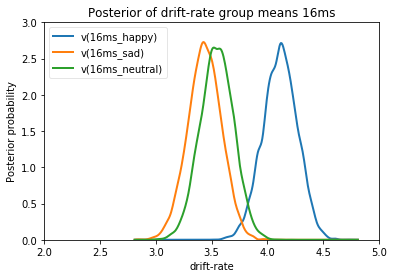

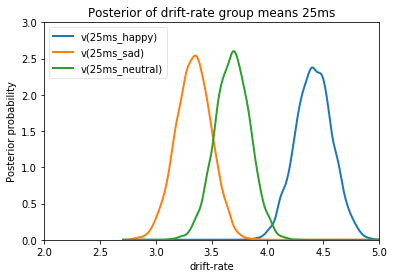

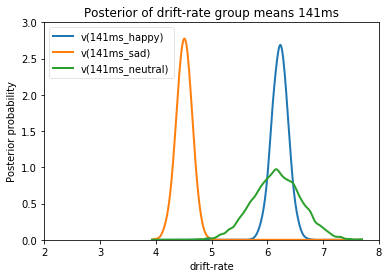

In [80]:
v_8ms_happy, v_8ms_sad, v_8ms_neutral,v_16ms_happy, v_16ms_sad, v_16ms_neutral, v_25ms_happy, v_25ms_sad, v_25ms_neutral, v_141ms_happy, v_141ms_sad, v_141ms_neutral  = m.nodes_db.node[['v(8ms_happy)', 'v(8ms_sad)', 'v(8ms_neutral)','v(16ms_happy)', 'v(16ms_sad)', 'v(16ms_neutral)', 'v(25ms_happy)', 'v(25ms_sad)', 'v(25ms_neutral)', 'v(141ms_happy)', 'v(141ms_sad)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_8ms_sad, v_8ms_neutral,v_16ms_happy, v_16ms_sad, v_16ms_neutral, v_25ms_happy, v_25ms_sad, v_25ms_neutral, v_141ms_happy, v_141ms_sad, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(2,13)
plt.ylim(0,3)

v_8ms_happy, v_8ms_sad, v_8ms_neutral= m.nodes_db.node[['v(8ms_happy)', 'v(8ms_sad)', 'v(8ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_8ms_sad, v_8ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 8ms')
plt.xlim(2,5)
plt.ylim(0,3)

v_16ms_happy, v_16ms_sad, v_16ms_neutral= m.nodes_db.node[['v(16ms_happy)', 'v(16ms_sad)', 'v(16ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_16ms_happy, v_16ms_sad, v_16ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 16ms')
plt.xlim(2,5)
plt.ylim(0,3)

v_25ms_happy, v_25ms_sad, v_25ms_neutral= m.nodes_db.node[['v(25ms_happy)', 'v(25ms_sad)', 'v(25ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_25ms_happy, v_25ms_sad, v_25ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 25ms')
plt.xlim(2,5)
plt.ylim(0,3)

v_141ms_happy, v_141ms_sad, v_141ms_neutral= m.nodes_db.node[['v(141ms_happy)', 'v(141ms_sad)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_141ms_happy, v_141ms_sad, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 141ms')
plt.xlim(2,8)
plt.ylim(0,3)


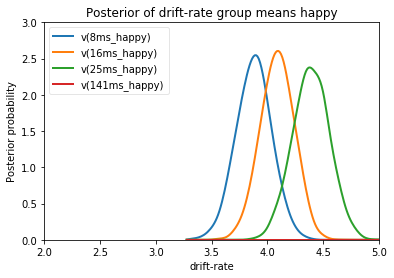

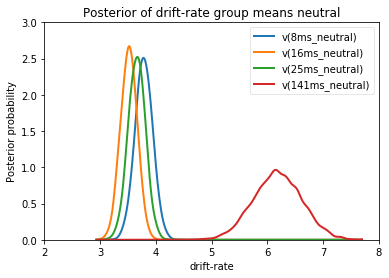

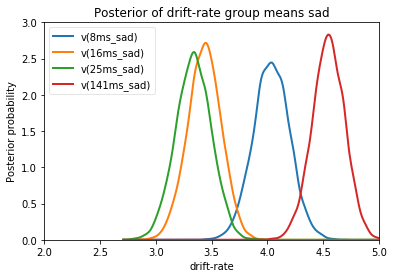

In [81]:
v_8ms_happy, v_16ms_happy, v_25ms_happy, v_141ms_happy= m.nodes_db.node[['v(8ms_happy)', 'v(16ms_happy)', 'v(25ms_happy)', 'v(141ms_happy)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_16ms_happy, v_25ms_happy, v_141ms_happy])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means happy')
plt.xlim(2,5)
plt.ylim(0,3)


v_8ms_neutral, v_16ms_neutral, v_25ms_neutral, v_141ms_neutral= m.nodes_db.node[['v(8ms_neutral)', 'v(16ms_neutral)', 'v(25ms_neutral)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_neutral, v_16ms_neutral, v_25ms_neutral, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means neutral')
plt.xlim(2,8)
plt.ylim(0,3)

v_8ms_sad, v_16ms_sad, v_25ms_sad, v_141ms_sad= m.nodes_db.node[['v(8ms_sad)', 'v(16ms_sad)', 'v(25ms_sad)', 'v(141ms_sad)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_sad, v_16ms_sad, v_25ms_sad, v_141ms_sad])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means sad')
plt.xlim(2,5)
plt.ylim(0,3)


In [82]:
print "P(8ms_happy > 8ms_sad)=",(v_8ms_happy.trace() > v_8ms_sad.trace()).mean()
print "P(8ms_happy > 8ms_neutral)=",(v_8ms_happy.trace() > v_8ms_neutral.trace()).mean()

print "P(16ms_happy > 16ms_sad)=",(v_16ms_happy.trace() > v_16ms_sad.trace()).mean()
print "P(16ms_happy > 16ms_neutral)=",(v_16ms_happy.trace() > v_16ms_neutral.trace()).mean()

print "P(25ms_happy > 25ms_sad)=",(v_25ms_happy.trace() > v_25ms_sad.trace()).mean()
print "P(25ms_happy > 25ms_neutral)=",(v_25ms_happy.trace() > v_25ms_neutral.trace()).mean()

print "P(141ms_happy > 141ms_sad)=",(v_141ms_happy.trace() > v_141ms_sad.trace()).mean()
print "P(141ms_happy > 141ms_neutral)=",(v_141ms_happy.trace() > v_141ms_neutral.trace()).mean()


print "P(8ms_happy > 16ms_happy)=",(v_8ms_happy.trace() > v_16ms_happy.trace()).mean()
print "P(8ms_happy > 25ms_happy)=",(v_8ms_happy.trace() > v_25ms_happy.trace()).mean()
print "P(8ms_happy > 141ms_happy)=",(v_8ms_happy.trace() > v_141ms_happy.trace()).mean()
print "P(16ms_happy > 25ms_happy)=",(v_16ms_happy.trace() > v_25ms_happy.trace()).mean()
print "P(16ms_happy > 141ms_happy)=",(v_16ms_happy.trace() > v_141ms_happy.trace()).mean()
print "P(25ms_happy > 141ms_happy)=",(v_25ms_happy.trace() > v_141ms_happy.trace()).mean()


print "P(8ms_sad > 16ms_sad)=",(v_8ms_sad.trace() > v_16ms_sad.trace()).mean()
print "P(8ms_sad > 25ms_sad)=",(v_8ms_sad.trace() > v_25ms_sad.trace()).mean()
print "P(8ms_sad > 141ms_sad)=",(v_8ms_sad.trace() > v_141ms_sad.trace()).mean()
print "P(16ms_sad > 25ms_sad)=",(v_16ms_sad.trace() > v_25ms_sad.trace()).mean()
print "P(16ms_sad > 141ms_sad)=",(v_16ms_sad.trace() > v_141ms_sad.trace()).mean()
print "P(25ms_sad > 141ms_sad)=",(v_25ms_sad.trace() > v_141ms_sad.trace()).mean()


print "P(8ms_neutral > 16ms_neutral)=",(v_8ms_neutral.trace() > v_16ms_neutral.trace()).mean()
print "P(8ms_neutral > 25ms_neutral)=",(v_8ms_neutral.trace() > v_25ms_neutral.trace()).mean()
print "P(8ms_neutral > 141ms_neutral)=",(v_8ms_neutral.trace() > v_141ms_neutral.trace()).mean()
print "P(16ms_neutral > 25ms_neutral)=",(v_16ms_neutral.trace() > v_25ms_neutral.trace()).mean()
print "P(16ms_neutral > 141ms_neutral)=",(v_16ms_neutral.trace() > v_141ms_neutral.trace()).mean()
print "P(25ms_neutral > 141ms_neutral)=",(v_25ms_neutral.trace() > v_141ms_neutral.trace()).mean()

P(8ms_happy > 8ms_sad)= 0.2422110552763819
P(8ms_happy > 8ms_neutral)= 0.6782914572864321
P(16ms_happy > 16ms_sad)= 0.9998994974874372
P(16ms_happy > 16ms_neutral)= 0.9987939698492462
P(25ms_happy > 25ms_sad)= 1.0
P(25ms_happy > 25ms_neutral)= 0.9996984924623116
P(141ms_happy > 141ms_sad)= 1.0
P(141ms_happy > 141ms_neutral)= 0.5485929648241206
P(8ms_happy > 16ms_happy)= 0.12884422110552765
P(8ms_happy > 25ms_happy)= 0.0051256281407035175
P(8ms_happy > 141ms_happy)= 0.0
P(16ms_happy > 25ms_happy)= 0.058241206030150754
P(16ms_happy > 141ms_happy)= 0.0
P(25ms_happy > 141ms_happy)= 0.0
P(8ms_sad > 16ms_sad)= 0.9993467336683417
P(8ms_sad > 25ms_sad)= 0.9998492462311558
P(8ms_sad > 141ms_sad)= 0.0023115577889447235
P(16ms_sad > 25ms_sad)= 0.7022613065326633
P(16ms_sad > 141ms_sad)= 0.0
P(25ms_sad > 141ms_sad)= 0.0
P(8ms_neutral > 16ms_neutral)= 0.9310050251256281
P(8ms_neutral > 25ms_neutral)= 0.754070351758794
P(8ms_neutral > 141ms_neutral)= 0.0
P(16ms_neutral > 25ms_neutral)= 0.21663316582

a higher drift rate produces faster and more accurate responses, while a lower drift rate produces slower and less accurate responses
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2474742/

# Analyse Models Conditions
## Gelman Rubin R Statistic
### Bias

In [11]:
models = list()
for i in range(5):
    m_bias = hddm.HDDM(data, p_outlier=0.05,depends_on={'t': 'conditions'})   
    m_bias.find_starting_values()
    m_bias.sample(20000, burn=5000, thin=5)
    models.append(m)
hddm.analyze.gelman_rubin(models)

 [-----------------100%-----------------] 20000 of 20000 complete in 2502.5 sec

{'a': 0.9998333194421292,
 'a_std': 0.9998333194421292,
 'a_subj.EMOCONPILOT001': 0.9998333194421292,
 'a_subj.EMOCONPILOT003': 0.9998333194421293,
 'a_subj.EMOCONPILOT004': 0.9998333194421292,
 'a_subj.EMOCONPILOT005_120HZ': 0.9998333194421292,
 'a_subj.EMOCONPILOT006': 0.9998333194421292,
 'a_subj.EMOCONPILOT007': 0.9998333194421293,
 'a_subj.EMOCONPILOT008': 0.9998333194421292,
 'a_subj.EMOCONPILOT009': 0.9998333194421292,
 'a_subj.EMOCONPILOT010': 0.9998333194421292,
 'a_subj.EMOCONPILOT011': 0.9998333194421292,
 'a_subj.EMOCONPILOT014': 0.9998333194421292,
 'a_subj.EMOCONPILOT015': 0.9998333194421292,
 'a_subj.EMOCONPILOT016': 0.9998333194421292,
 'a_subj.EMOCONPILOT017': 0.9998333194421292,
 'a_subj.EMOCONPILOT018': 0.9998333194421292,
 'a_subj.EMOCONPILOT020': 0.9998333194421292,
 'a_subj.EMOCONPILOT021': 0.9998333194421292,
 'a_subj.EMOCONPILOT022': 0.9998333194421292,
 'a_subj.EMOCONPILOT024': 0.9998333194421292,
 'a_subj.EmoCon002': 0.9998333194421292,
 't': 0.999833319442129

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t(141ms_happy)
Plotting t(141ms_neutral)
Plotting t(141ms_sad)
Plotting t(16ms_happy)
Plotting t(16ms_neutral)
Plotting t(16ms_sad)
Plotting t(25ms_happy)
Plotting t(25ms_neutral)
Plotting t(25ms_sad)
Plotting t(8ms_happy)
Plotting t(8ms_neutral)
Plotting t(8ms_sad)
Plotting t_std


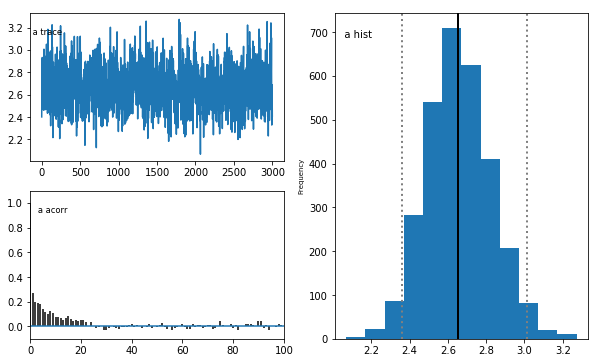

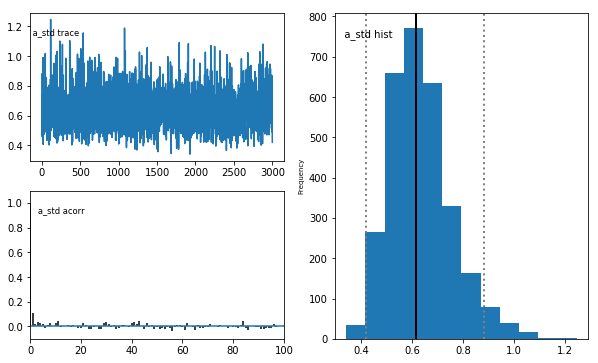

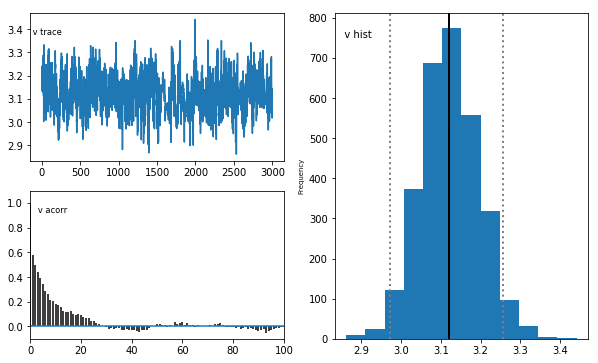

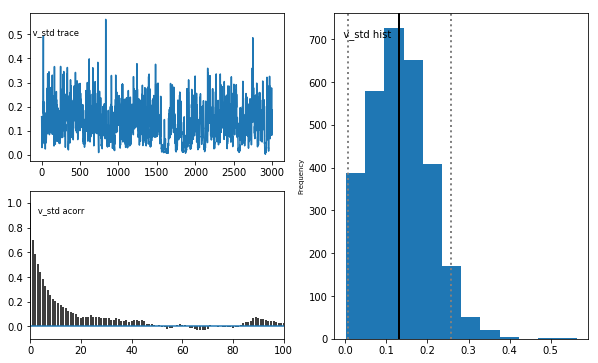

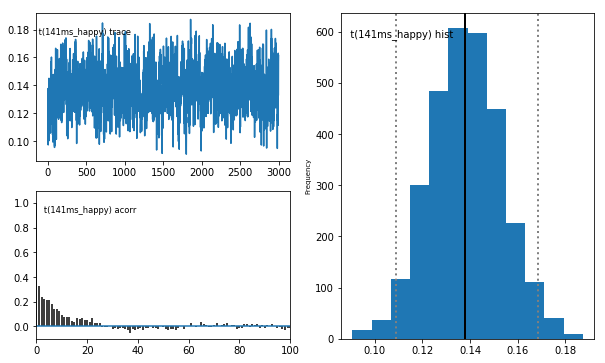

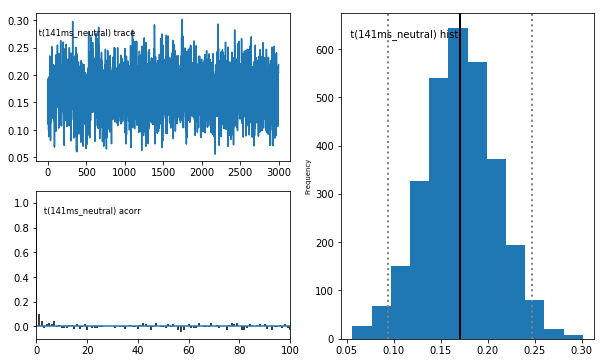

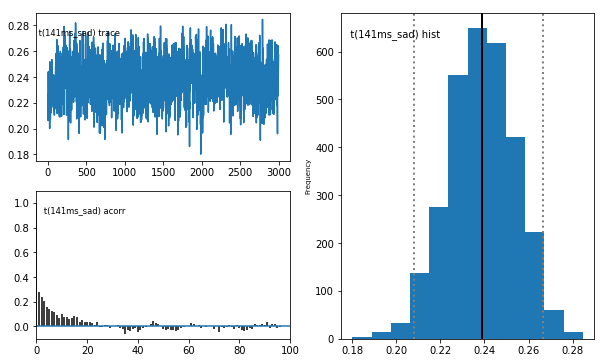

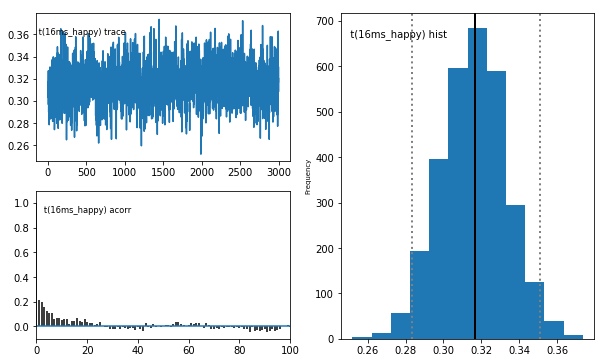

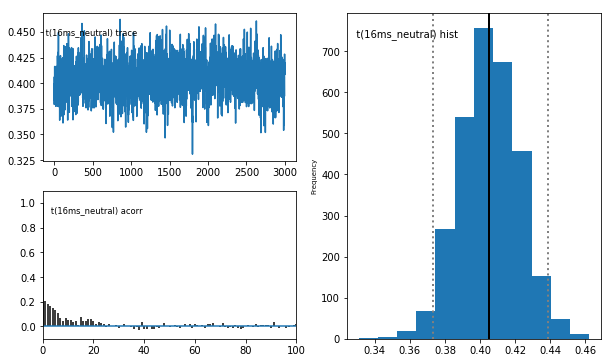

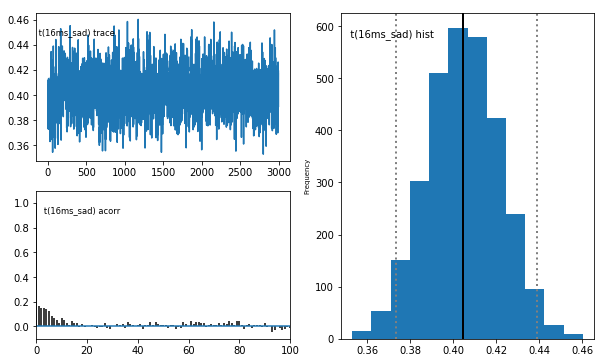

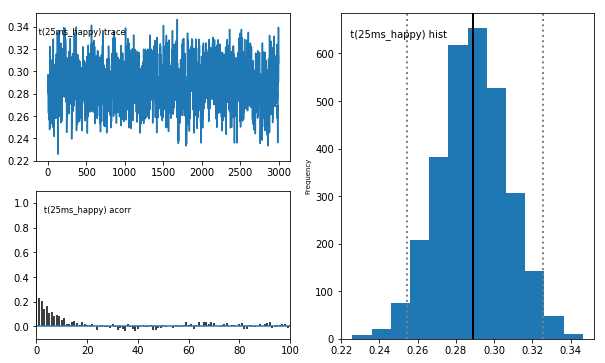

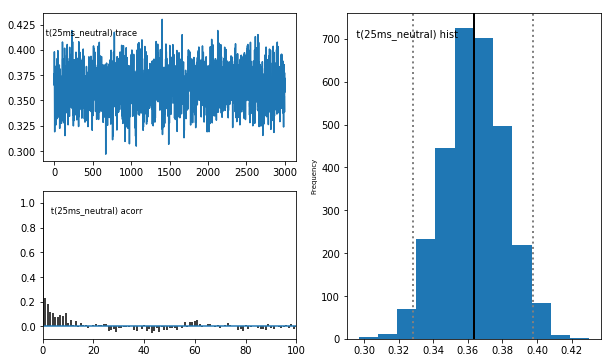

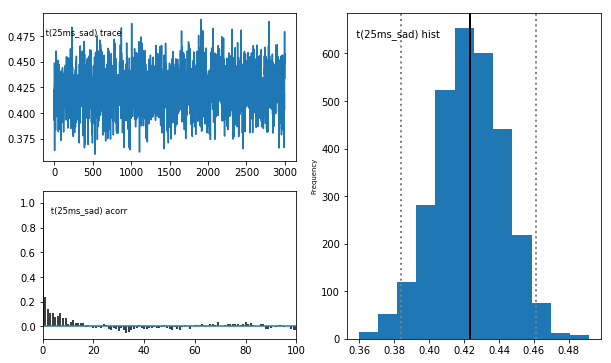

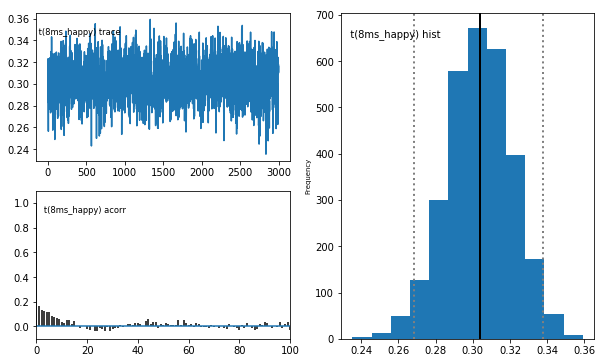

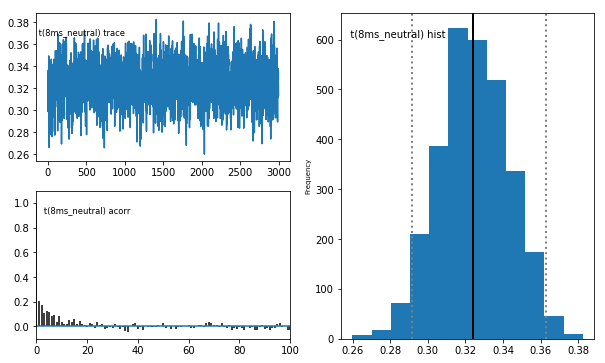

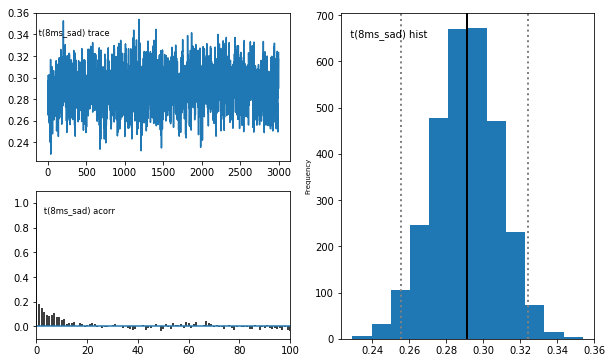

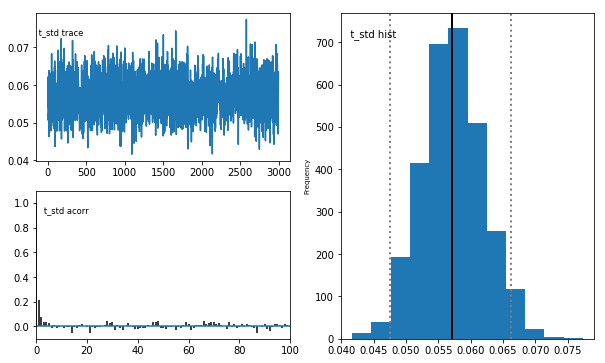

In [12]:
m_bias.plot_posteriors()

In [13]:
m_bias.print_stats()

                                                 mean         std       2.5q        25q        50q        75q      97.5q       mc err
a                                             2.65799    0.169229    2.35225    2.54221    2.65418    2.76769    3.00625   0.00647525
a_std                                        0.632469    0.122409   0.434298   0.546877   0.616552    0.70184   0.915992   0.00281242
a_subj.EMOCONPILOT001                         2.04047    0.148216     1.7716    1.93857    2.03722    2.13493    2.35246   0.00649647
a_subj.EMOCONPILOT003                         3.33296    0.218588    2.91021    3.18588    3.32749    3.47521    3.77278   0.00798353
a_subj.EMOCONPILOT004                         2.82879    0.202784    2.44615    2.69507    2.82945    2.96743    3.23343    0.0077863
a_subj.EMOCONPILOT005_120HZ                   2.31962     0.17133    1.99889    2.20235    2.31601    2.43358    2.67649   0.00658963
a_subj.EMOCONPILOT006                          2.0232     0.15

# Draw All Conditions Bias

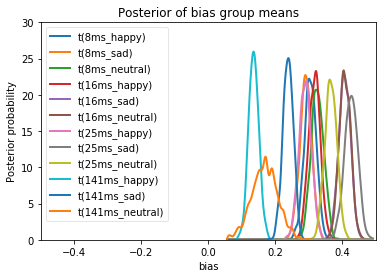

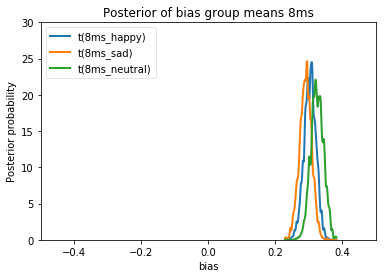

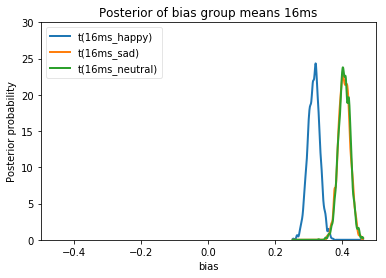

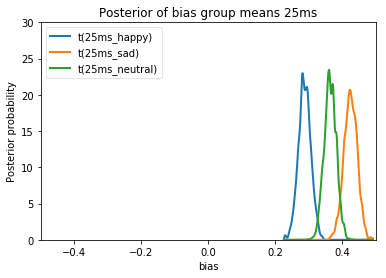

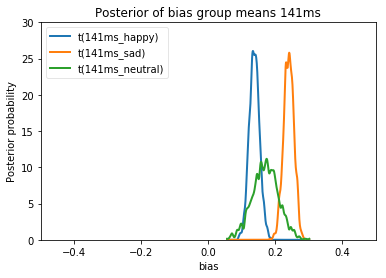

In [23]:
t_8ms_happy, t_8ms_sad, t_8ms_neutral,t_16ms_happy, t_16ms_sad, t_16ms_neutral, t_25ms_happy, t_25ms_sad, t_25ms_neutral, t_141ms_happy, t_141ms_sad, t_141ms_neutral  = m_bias.nodes_db.node[['t(8ms_happy)', 't(8ms_sad)', 't(8ms_neutral)','t(16ms_happy)', 't(16ms_sad)', 't(16ms_neutral)', 't(25ms_happy)', 't(25ms_sad)', 't(25ms_neutral)', 't(141ms_happy)', 't(141ms_sad)', 't(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([t_8ms_happy, t_8ms_sad, t_8ms_neutral,t_16ms_happy, t_16ms_sad, t_16ms_neutral, t_25ms_happy, t_25ms_sad, t_25ms_neutral, t_141ms_happy, t_141ms_sad, t_141ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means')
plt.xlim(-0.5,0.5)
plt.ylim(0,30)

t_8ms_happy, t_8ms_sad, t_8ms_neutral= m_bias.nodes_db.node[['t(8ms_happy)', 't(8ms_sad)', 't(8ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([t_8ms_happy, t_8ms_sad, t_8ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means 8ms')
plt.xlim(-0.3,0.5)
plt.ylim(0,30)


t_16ms_happy, t_16ms_sad, t_16ms_neutral= m_bias.nodes_db.node[['t(16ms_happy)', 't(16ms_sad)', 't(16ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([t_16ms_happy, t_16ms_sad, t_16ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means 16ms')
plt.xlim(-0.3,0.5)
plt.ylim(0,30)

t_25ms_happy, t_25ms_sad, t_25ms_neutral= m_bias.nodes_db.node[['t(25ms_happy)', 't(25ms_sad)', 't(25ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([t_25ms_happy, t_25ms_sad, t_25ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means 25ms')
plt.xlim(-0.3,0.5)
plt.ylim(0,30)


t_141ms_happy, t_141ms_sad, t_141ms_neutral= m_bias.nodes_db.node[['t(141ms_happy)', 't(141ms_sad)', 't(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([t_141ms_happy, t_141ms_sad, t_141ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means 141ms')
plt.xlim(-0.3,0.5)
plt.ylim(0,30)


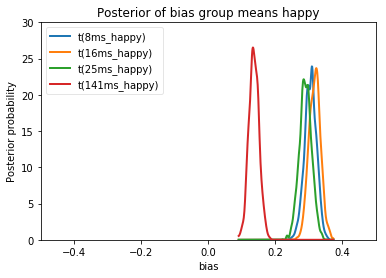

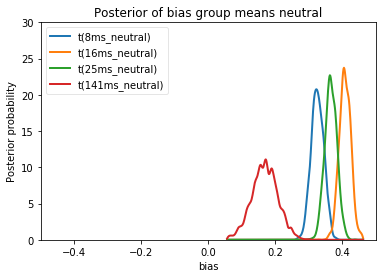

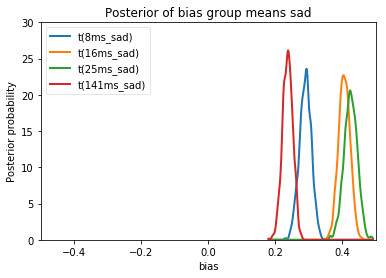

In [26]:
t_8ms_happy, t_16ms_happy, t_25ms_happy, t_141ms_happy= m_bias.nodes_db.node[['t(8ms_happy)', 't(16ms_happy)', 't(25ms_happy)', 't(141ms_happy)']] 
hddm.analyze.plot_posterior_nodes([t_8ms_happy, t_16ms_happy, t_25ms_happy, t_141ms_happy])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means happy')
plt.xlim(-0.3,0.5)
plt.ylim(0,30)


t_8ms_neutral, t_16ms_neutral, t_25ms_neutral, t_141ms_neutral= m_bias.nodes_db.node[['t(8ms_neutral)', 't(16ms_neutral)', 't(25ms_neutral)', 't(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([t_8ms_neutral, t_16ms_neutral, t_25ms_neutral, t_141ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means neutral')
plt.xlim(-0.3,0.5)
plt.ylim(0,30)

t_8ms_sad, t_16ms_sad, t_25ms_sad, t_141ms_sad= m_bias.nodes_db.node[['t(8ms_sad)', 't(16ms_sad)', 't(25ms_sad)', 't(141ms_sad)']] 
hddm.analyze.plot_posterior_nodes([t_8ms_sad, t_16ms_sad, t_25ms_sad, t_141ms_sad])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means sad')
plt.xlim(-0.3,0.5)
plt.ylim(0,30)


# Statistics All Conditions Bias

In [29]:
print "P(8ms_happy > 8ms_sad)=",(t_8ms_happy.trace() > t_8ms_sad.trace()).mean()
print "P(8ms_happy > 8ms_neutral)=",(t_8ms_happy.trace() > t_8ms_neutral.trace()).mean()

print "P(16ms_happy > 16ms_sad)=",(t_16ms_happy.trace() > t_16ms_sad.trace()).mean()
print "P(16ms_happy > 16ms_neutral)=",(t_16ms_happy.trace() > t_16ms_neutral.trace()).mean()

print "P(25ms_happy > 25ms_sad)=",(t_25ms_happy.trace() > t_25ms_sad.trace()).mean()
print "P(25ms_happy > 25ms_neutral)=",(t_25ms_happy.trace() > t_25ms_neutral.trace()).mean()

print "P(141ms_happy > 141ms_sad)=",(t_141ms_happy.trace() > t_141ms_sad.trace()).mean()
print "P(141ms_happy > 141ms_neutral)=",(t_141ms_happy.trace() > t_141ms_neutral.trace()).mean()

print "P(8ms_happy > 16ms_happy)=",(t_8ms_happy.trace() > t_16ms_happy.trace()).mean()
print "P(8ms_happy > 25ms_happy)=",(t_8ms_happy.trace() > t_25ms_happy.trace()).mean()
print "P(8ms_happy > 141ms_happy)=",(t_8ms_happy.trace() > t_141ms_happy.trace()).mean()
print "P(16ms_happy > 25ms_happy)=",(t_16ms_happy.trace() > t_25ms_happy.trace()).mean()
print "P(16ms_happy > 141ms_happy)=",(t_16ms_happy.trace() > t_141ms_happy.trace()).mean()
print "P(25ms_happy > 141ms_happy)=",(t_25ms_happy.trace() > t_141ms_happy.trace()).mean()

print "P(8ms_sad > 16ms_sad)=",(t_8ms_sad.trace() > t_16ms_sad.trace()).mean()
print "P(8ms_sad > 25ms_sad)=",(t_8ms_sad.trace() > t_25ms_sad.trace()).mean()
print "P(8ms_sad > 141ms_sad)=",(t_8ms_sad.trace() > t_141ms_sad.trace()).mean()
print "P(16ms_sad > 25ms_sad)=",(t_16ms_sad.trace() > t_25ms_sad.trace()).mean()
print "P(16ms_sad > 141ms_sad)=",(t_16ms_sad.trace() > t_141ms_sad.trace()).mean()
print "P(25ms_sad > 141ms_sad)=",(t_25ms_sad.trace() > t_141ms_sad.trace()).mean()

print "P(8ms_neutral > 16ms_neutral)=",(t_8ms_neutral.trace() > t_16ms_neutral.trace()).mean()
print "P(8ms_neutral > 25ms_neutral)=",(t_8ms_neutral.trace() > t_25ms_neutral.trace()).mean()
print "P(8ms_neutral > 141ms_neutral)=",(t_8ms_neutral.trace() > t_141ms_neutral.trace()).mean()
print "P(16ms_neutral > 25ms_neutral)=",(t_16ms_neutral.trace() > t_25ms_neutral.trace()).mean()
print "P(16ms_neutral > 141ms_neutral)=",(t_16ms_neutral.trace() > t_141ms_neutral.trace()).mean()
print "P(25ms_neutral > 141ms_neutral)=",(t_25ms_neutral.trace() > t_141ms_neutral.trace()).mean()

P(8ms_happy > 8ms_sad)= 0.7086666666666667
P(8ms_happy > 8ms_neutral)= 0.18333333333333332
P(16ms_happy > 16ms_sad)= 0.0
P(16ms_happy > 16ms_neutral)= 0.0
P(25ms_happy > 25ms_sad)= 0.0
P(25ms_happy > 25ms_neutral)= 0.0
P(141ms_happy > 141ms_sad)= 0.0
P(141ms_happy > 141ms_neutral)= 0.20466666666666666
P(8ms_happy > 16ms_happy)= 0.2803333333333333
P(8ms_happy > 25ms_happy)= 0.7446666666666667
P(8ms_happy > 141ms_happy)= 1.0
P(16ms_happy > 25ms_happy)= 0.8956666666666667
P(16ms_happy > 141ms_happy)= 1.0
P(25ms_happy > 141ms_happy)= 1.0
P(8ms_sad > 16ms_sad)= 0.0
P(8ms_sad > 25ms_sad)= 0.0
P(8ms_sad > 141ms_sad)= 0.995
P(16ms_sad > 25ms_sad)= 0.20666666666666667
P(16ms_sad > 141ms_sad)= 1.0
P(25ms_sad > 141ms_sad)= 1.0
P(8ms_neutral > 16ms_neutral)= 0.0
P(8ms_neutral > 25ms_neutral)= 0.041
P(8ms_neutral > 141ms_neutral)= 1.0
P(16ms_neutral > 25ms_neutral)= 0.97
P(16ms_neutral > 141ms_neutral)= 1.0
P(25ms_neutral > 141ms_neutral)= 1.0


# Analyse Models Haupteffekte
## Gelman Rubin R Statistic
### Drift Rate

In [ ]:
#Gelman Rubin R statistic 
models = list()
for i in range(5):
    model_stim = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'stim'})    #, depends_on={'v': 'stim'})
    model_stim.find_starting_values()
    model_stim.sample(2000, burn=20) 
    models.append(m)
hddm.analyze.gelman_rubin(models)

#t': 0.999499874937461,
#'a': 0.9994998749374608,
#'a_std':0.9994998749374608,

In [51]:
#Gelman Rubin R statistic 
models = list()
for i in range(5):
    model_level = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'level'})    #, depends_on={'v': 'stim'})
    model_level.find_starting_values()
    model_level.sample(2000, burn=20) 
    models.append(m)
hddm.analyze.gelman_rubin(models)

#t': 0.999499874937461,
#'a': 0.9994998749374608,
#'a_std':0.9994998749374608


 [-----------------100%-----------------] 2000 of 2000 complete in 177.8 sec

{'a': 0.9994998749374608,
 'a_std': 0.9994998749374608,
 'a_subj.EMOCONPILOT001': 0.999499874937461,
 'a_subj.EMOCONPILOT003': 0.999499874937461,
 'a_subj.EMOCONPILOT004': 0.999499874937461,
 'a_subj.EMOCONPILOT005_120HZ': 0.9994998749374608,
 'a_subj.EMOCONPILOT006': 0.999499874937461,
 'a_subj.EMOCONPILOT007': 0.999499874937461,
 'a_subj.EMOCONPILOT008': 0.999499874937461,
 'a_subj.EMOCONPILOT009': 0.999499874937461,
 'a_subj.EMOCONPILOT010': 0.999499874937461,
 'a_subj.EMOCONPILOT011': 0.999499874937461,
 'a_subj.EMOCONPILOT014': 0.999499874937461,
 'a_subj.EMOCONPILOT015': 0.999499874937461,
 'a_subj.EMOCONPILOT016': 0.999499874937461,
 'a_subj.EMOCONPILOT017': 0.999499874937461,
 'a_subj.EMOCONPILOT018': 0.999499874937461,
 'a_subj.EMOCONPILOT020': 0.9994998749374608,
 'a_subj.EMOCONPILOT021': 0.999499874937461,
 'a_subj.EMOCONPILOT022': 0.999499874937461,
 'a_subj.EMOCONPILOT024': 0.9994998749374608,
 'a_subj.EmoCon002': 0.999499874937461,
 't': 0.999499874937461,
 't_std': 0.999

In [31]:
model_stim = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'stim'})    #, depends_on={'v': 'stim'})
model_stim.find_starting_values()
model_stim.sample(2000, burn=20) 
models.append(m)

 [-----------------100%-----------------] 2000 of 2000 complete in 101.0 sec

In [32]:
model_level = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'level'})    #, depends_on={'v': 'stim'})
model_level.find_starting_values()
model_level.sample(2000, burn=20) 

 [-----------------100%-----------------] 2001 of 2000 complete in 135.0 sec

Plotting a
Plotting a_std
Plotting v(happy)
Plotting v(neutral)
Plotting v(sad)
Plotting v_std
Plotting t
Plotting t_std


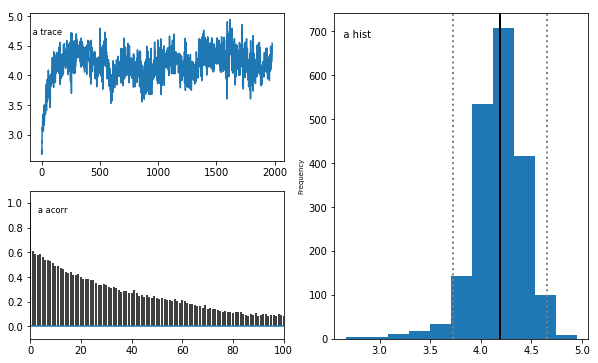

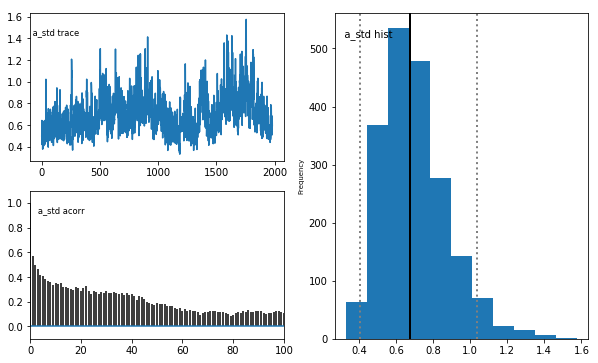

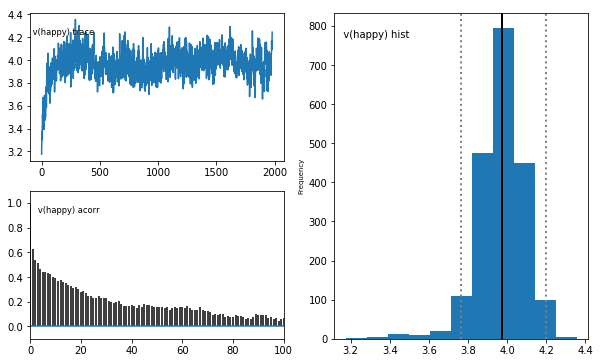

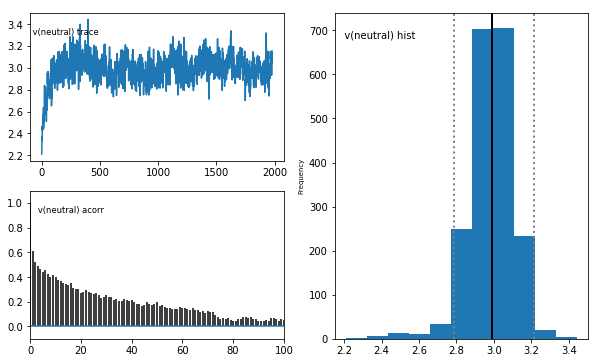

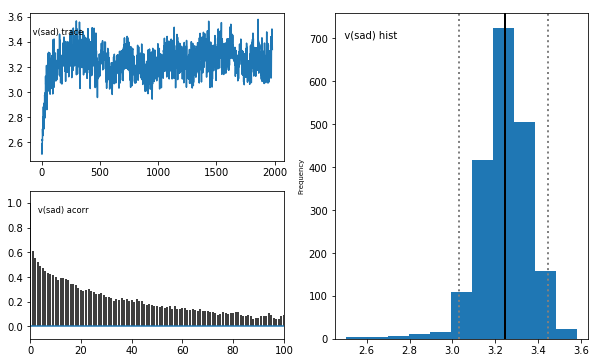

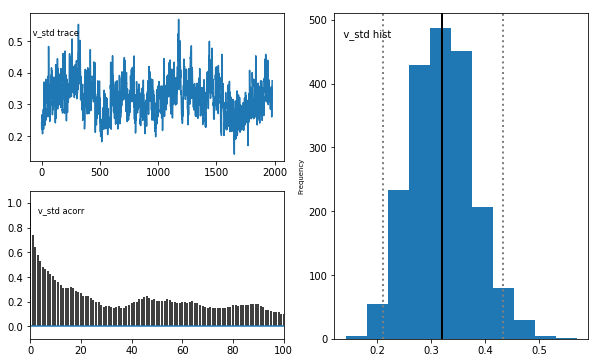

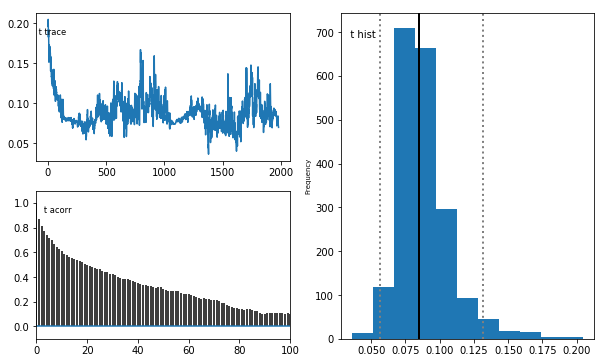

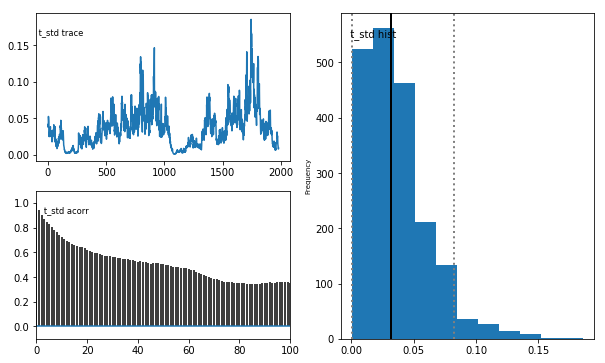

In [33]:
model_stim.plot_posteriors()

In [34]:
model_stim.print_stats()

                                           mean        std        2.5q        25q        50q        75q     97.5q      mc err
a                                       4.17527   0.251716     3.60849    4.04233    4.19129      4.333   4.59582   0.0199742
a_std                                  0.699617   0.175527    0.438824   0.571087   0.674309    0.79799   1.10434   0.0116815
a_subj.EMOCONPILOT001                   3.71004   0.294739     3.10008    3.54979    3.73181    3.89843   4.25824   0.0244992
a_subj.EMOCONPILOT003                   4.87086   0.365125     4.04601    4.68112    4.90845    5.09571   5.57268   0.0298028
a_subj.EMOCONPILOT004                   4.21923   0.328516     3.56053    4.01117     4.2069    4.43032   4.85746   0.0264954
a_subj.EMOCONPILOT005_120HZ             3.16444   0.294113     2.52978    2.99748    3.18425    3.36251   3.67387   0.0250259
a_subj.EMOCONPILOT006                   3.64786   0.412213     2.88728    3.33783    3.64999    3.98987   4.36761   0.

Plotting a
Plotting a_std
Plotting v(141ms)
Plotting v(16ms)
Plotting v(25ms)
Plotting v(8ms)
Plotting v_std
Plotting t
Plotting t_std


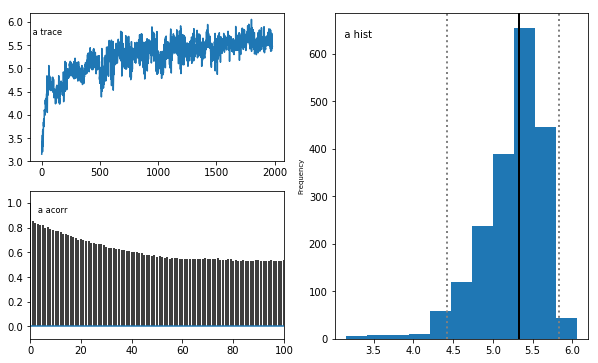

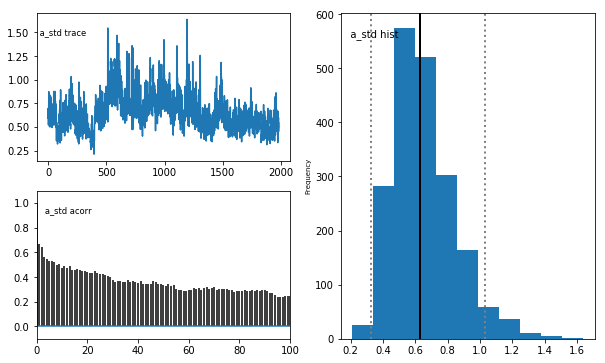

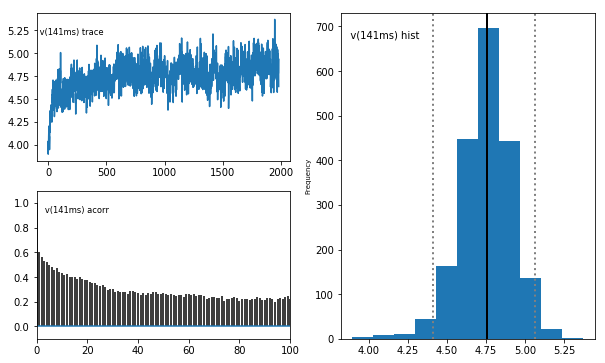

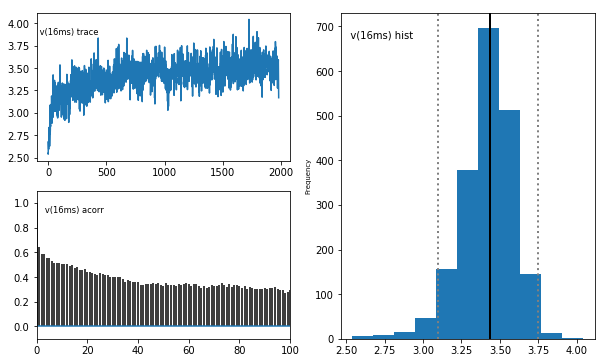

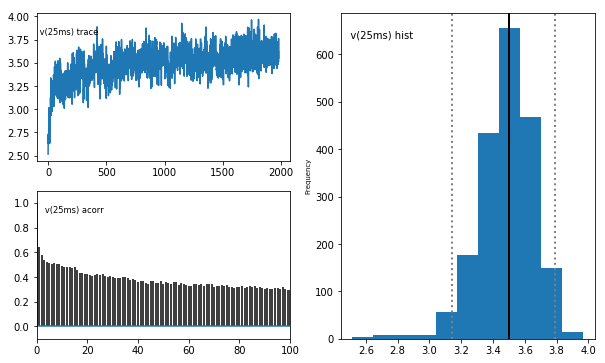

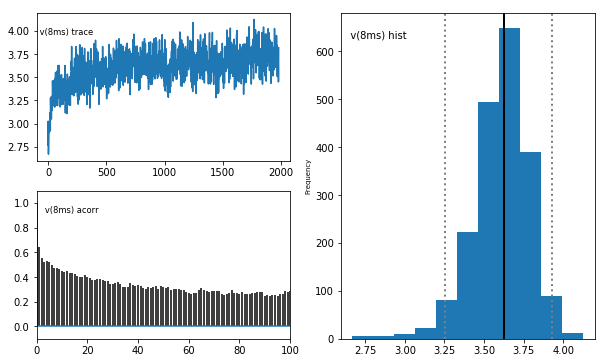

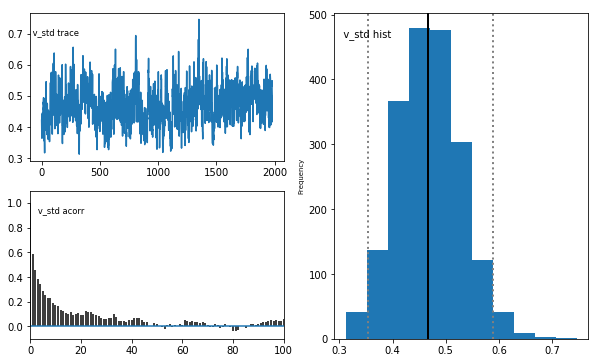

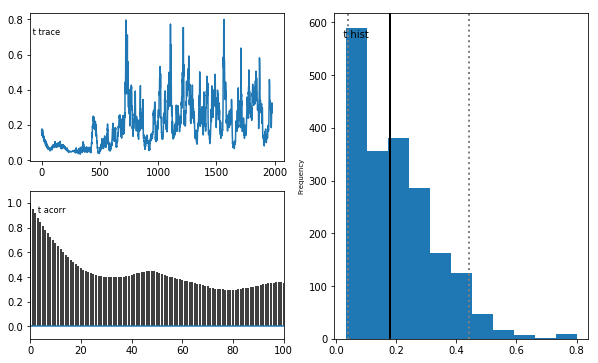

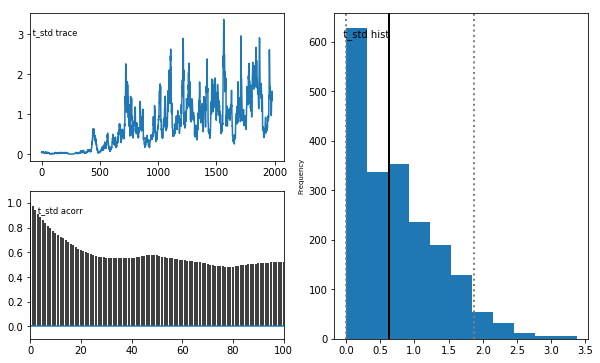

In [35]:
model_level.plot_posteriors()

In [36]:
model_level.print_stats()

                                         mean        std         2.5q          25q          50q         75q      97.5q      mc err
a                                     5.24161   0.398017       4.3208      5.04363       5.3273     5.52497    5.77965   0.0366427
a_std                                0.655632    0.19222     0.367513     0.519323     0.627449    0.757514    1.14249   0.0146578
a_subj.EMOCONPILOT001                 4.86453    0.47796      3.74088      4.57409      4.99131     5.20196    5.55192   0.0449357
a_subj.EMOCONPILOT003                 5.89292   0.544997      4.78878      5.50133      6.02502     6.27814    6.71159   0.0497751
a_subj.EMOCONPILOT004                 5.06783   0.384386       4.1748      4.87573      5.12459     5.32951    5.64175   0.0335863
a_subj.EMOCONPILOT005_120HZ            4.9163   0.396644      3.89986      4.77246      5.02255      5.1701    5.43764   0.0370296
a_subj.EMOCONPILOT006                 4.56296    0.58076      3.45679      4.16236 

# Plot

In [37]:
import matplotlib.pyplot

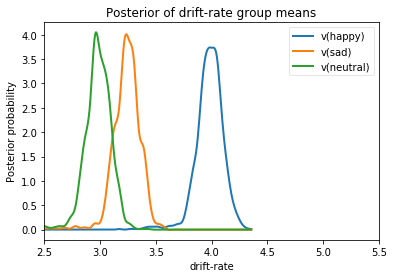

In [71]:
v_happy, v_sad, v_neutral = model_stim.nodes_db.node[['v(happy)', 'v(sad)', 'v(neutral)']] 
hddm.analyze.plot_posterior_nodes([v_happy, v_sad, v_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(2.5,5.5)


In [39]:
print "P(happy > sad)=",(v_happy.trace() > v_sad.trace()).mean()
print "P(sad > happy)=",(v_sad.trace() > v_happy.trace()).mean()
print "P(happy > neutral)=",(v_happy.trace() > v_neutral.trace()).mean()
print "P(sad > neutral)=",(v_sad.trace() > v_neutral.trace()).mean()

P(happy > sad)= 1.0
P(sad > happy)= 0.0
P(happy > neutral)= 1.0
P(sad > neutral)= 0.9858585858585859


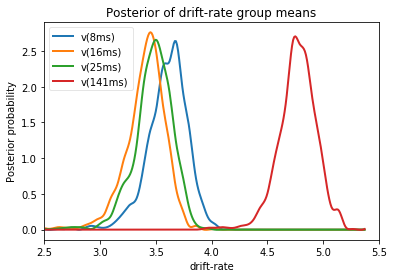

In [72]:
v_8ms, v_16ms, v_25ms, v_141ms = model_level.nodes_db.node[['v(8ms)', 'v(16ms)', 'v(25ms)', 'v(141ms)']] 
hddm.analyze.plot_posterior_nodes([v_8ms, v_16ms, v_25ms, v_141ms])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(2.5,5.5)


In [49]:
print "P(8ms > 16ms) =",(v_8ms.trace() > v_16ms.trace()).mean()
print "P(8ms > 25ms) =",(v_8ms.trace() > v_25ms.trace()).mean()
print "P(16ms > 25ms) =",(v_16ms.trace() > v_25ms.trace()).mean()
print "P(25ms > 141ms) =",(v_25ms.trace() > v_141ms.trace()).mean()
print "P(16ms > 141ms) =",(v_16ms.trace() > v_141ms.trace()).mean()
print "P(8ms > 141ms) =",(v_8ms.trace() > v_141ms.trace()).mean()

P(8ms > 16ms) = 0.8808080808080808
P(8ms > 25ms) = 0.7717171717171717
P(16ms > 25ms) = 0.32272727272727275
P(25ms > 141ms) = 0.0
P(16ms > 141ms) = 0.0
P(8ms > 141ms) = 0.0


## Gelman Rubin R Statistic
### Bias

In [42]:
models = list()
for i in range(5):
    model_level_bias = hddm.HDDM(data, p_outlier=0.05,depends_on={'t': 'level'})    
    model_level_bias.find_starting_values()
    model_level_bias.sample(2000, burn=20) 
    models.append(m)
hddm.analyze.gelman_rubin(models)

 [-----------------100%-----------------] 2000 of 2000 complete in 139.7 sec

{'a': 0.9998333194421292,
 'a_std': 0.9998333194421292,
 'a_subj.EMOCONPILOT001': 0.9998333194421292,
 'a_subj.EMOCONPILOT003': 0.9998333194421293,
 'a_subj.EMOCONPILOT004': 0.9998333194421292,
 'a_subj.EMOCONPILOT005_120HZ': 0.9998333194421292,
 'a_subj.EMOCONPILOT006': 0.9998333194421292,
 'a_subj.EMOCONPILOT007': 0.9998333194421293,
 'a_subj.EMOCONPILOT008': 0.9998333194421292,
 'a_subj.EMOCONPILOT009': 0.9998333194421292,
 'a_subj.EMOCONPILOT010': 0.9998333194421292,
 'a_subj.EMOCONPILOT011': 0.9998333194421292,
 'a_subj.EMOCONPILOT014': 0.9998333194421292,
 'a_subj.EMOCONPILOT015': 0.9998333194421292,
 'a_subj.EMOCONPILOT016': 0.9998333194421292,
 'a_subj.EMOCONPILOT017': 0.9998333194421292,
 'a_subj.EMOCONPILOT018': 0.9998333194421292,
 'a_subj.EMOCONPILOT020': 0.9998333194421292,
 'a_subj.EMOCONPILOT021': 0.9998333194421292,
 'a_subj.EMOCONPILOT022': 0.9998333194421292,
 'a_subj.EMOCONPILOT024': 0.9998333194421292,
 'a_subj.EmoCon002': 0.9998333194421292,
 't': 0.999833319442129

In [43]:
models = list()
for i in range(5):
    model_stim_bias = hddm.HDDM(data, p_outlier=0.05,depends_on={'t': 'stim'})   
    model_stim_bias.find_starting_values()
    model_stim_bias.sample(2000, burn=20) 
    models.append(m)
hddm.analyze.gelman_rubin(models)

 [-----------------100%-----------------] 2000 of 2000 complete in 120.3 sec

{'a': 0.9998333194421292,
 'a_std': 0.9998333194421292,
 'a_subj.EMOCONPILOT001': 0.9998333194421292,
 'a_subj.EMOCONPILOT003': 0.9998333194421293,
 'a_subj.EMOCONPILOT004': 0.9998333194421292,
 'a_subj.EMOCONPILOT005_120HZ': 0.9998333194421292,
 'a_subj.EMOCONPILOT006': 0.9998333194421292,
 'a_subj.EMOCONPILOT007': 0.9998333194421293,
 'a_subj.EMOCONPILOT008': 0.9998333194421292,
 'a_subj.EMOCONPILOT009': 0.9998333194421292,
 'a_subj.EMOCONPILOT010': 0.9998333194421292,
 'a_subj.EMOCONPILOT011': 0.9998333194421292,
 'a_subj.EMOCONPILOT014': 0.9998333194421292,
 'a_subj.EMOCONPILOT015': 0.9998333194421292,
 'a_subj.EMOCONPILOT016': 0.9998333194421292,
 'a_subj.EMOCONPILOT017': 0.9998333194421292,
 'a_subj.EMOCONPILOT018': 0.9998333194421292,
 'a_subj.EMOCONPILOT020': 0.9998333194421292,
 'a_subj.EMOCONPILOT021': 0.9998333194421292,
 'a_subj.EMOCONPILOT022': 0.9998333194421292,
 'a_subj.EMOCONPILOT024': 0.9998333194421292,
 'a_subj.EmoCon002': 0.9998333194421292,
 't': 0.999833319442129

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t(happy)
Plotting t(neutral)
Plotting t(sad)
Plotting t_std


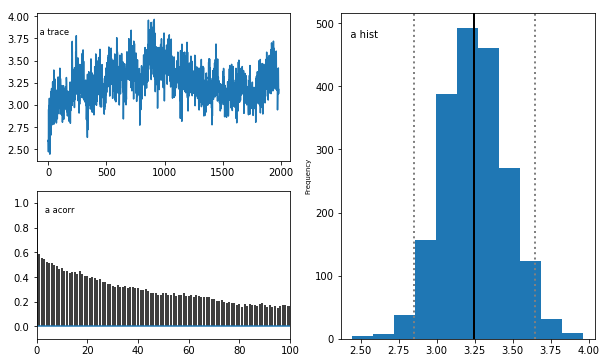

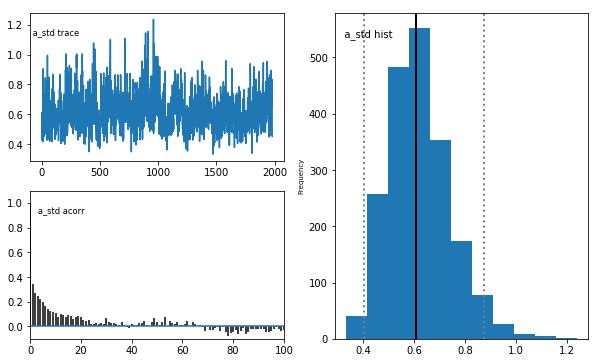

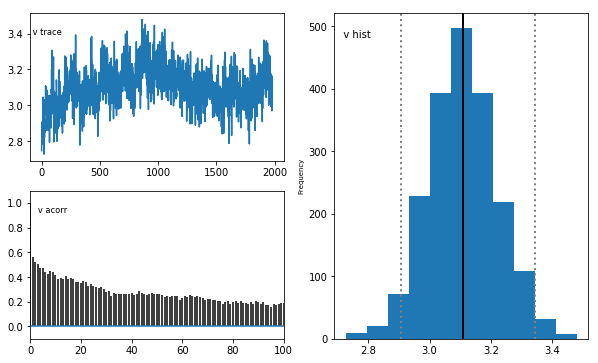

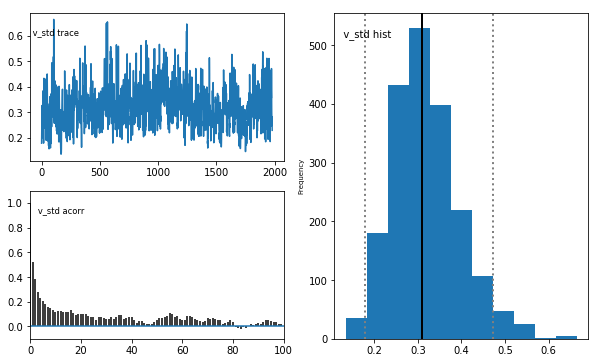

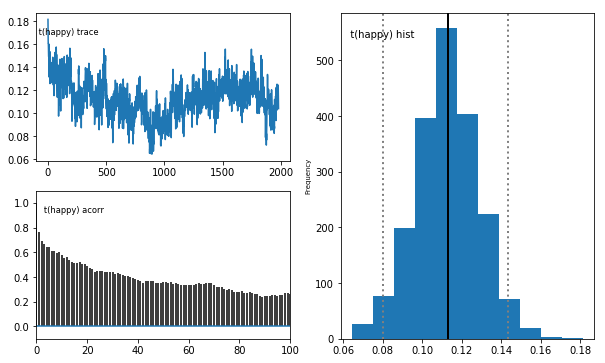

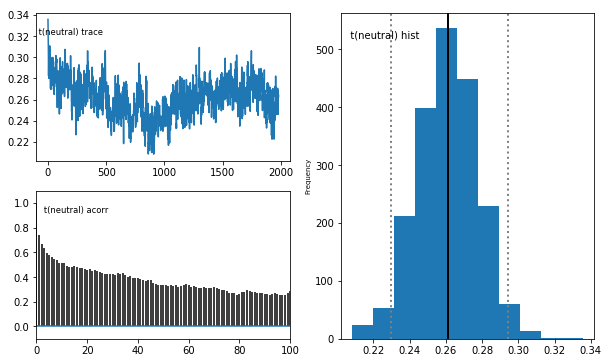

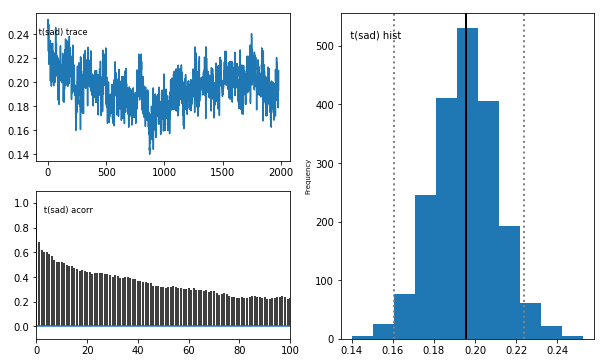

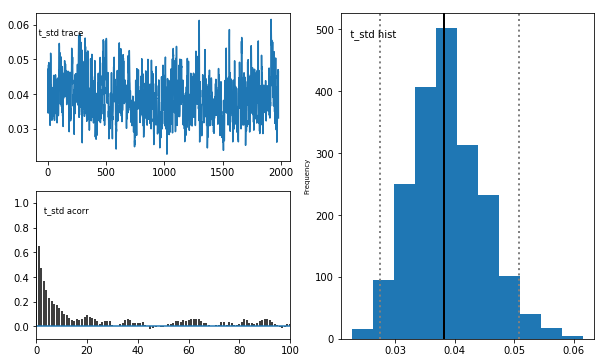

In [44]:
model_stim_bias.plot_posteriors()

In [45]:
model_stim_bias.print_stats()

                                           mean         std       2.5q        25q        50q        75q      97.5q       mc err
a                                       3.25184    0.209432    2.86049    3.10441    3.24728     3.3913    3.66644    0.0154159
a_std                                   0.62014      0.1232   0.419233   0.532401    0.60679   0.692267   0.898878     0.005771
a_subj.EMOCONPILOT001                   2.81814     0.25555    2.31647    2.63942    2.81018    2.99497    3.33435    0.0208618
a_subj.EMOCONPILOT003                   3.88948    0.320328    3.23263    3.66715    3.89387      4.107    4.50252     0.024395
a_subj.EMOCONPILOT004                   3.17962    0.228999    2.72938    3.02591    3.18177    3.32393    3.63512    0.0150565
a_subj.EMOCONPILOT005_120HZ             2.23865    0.185308    1.92244     2.1068    2.22421    2.35672    2.64596    0.0128956
a_subj.EMOCONPILOT006                   2.88989    0.299777     2.3557    2.66449    2.88848    3.09049 

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t(141ms)
Plotting t(16ms)
Plotting t(25ms)
Plotting t(8ms)
Plotting t_std


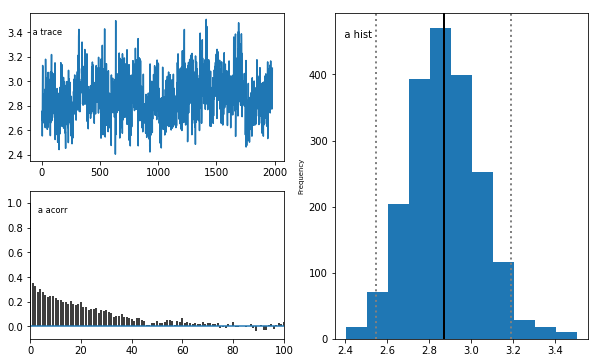

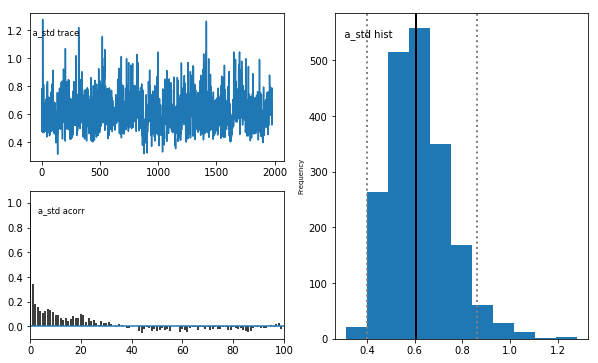

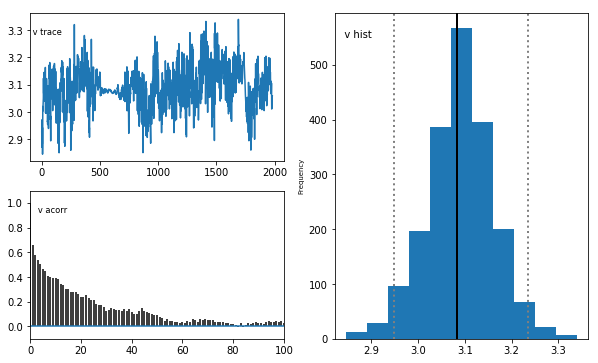

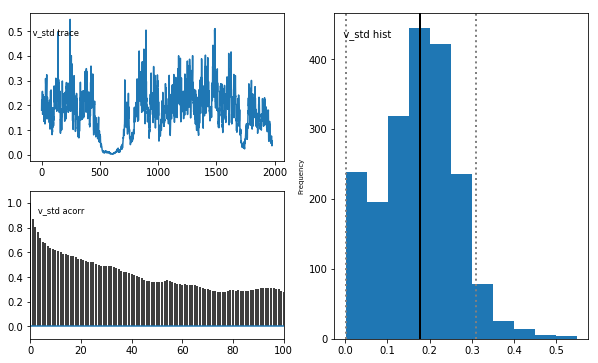

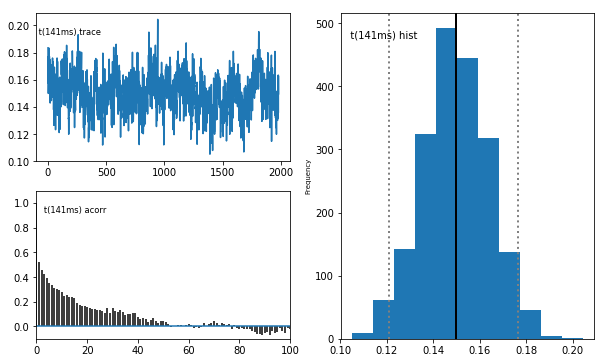

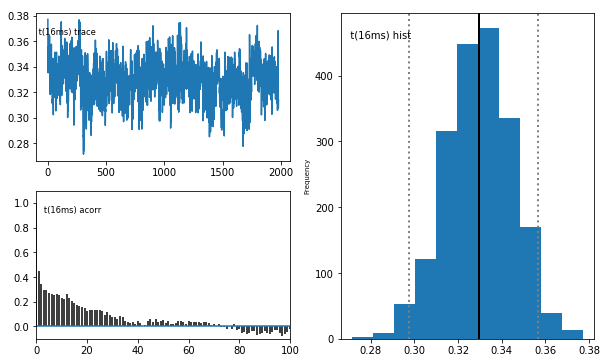

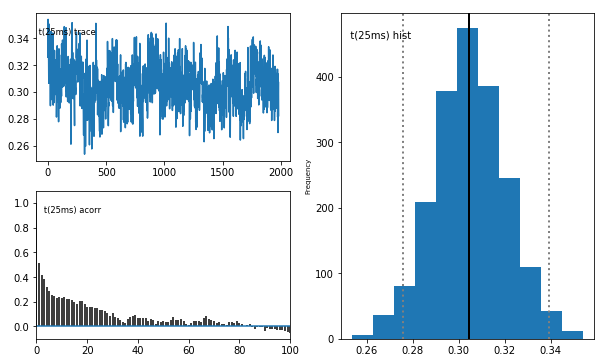

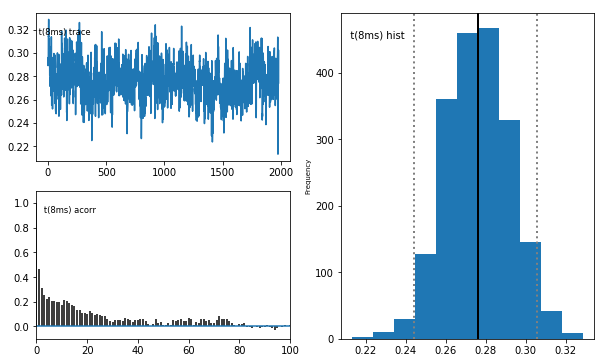

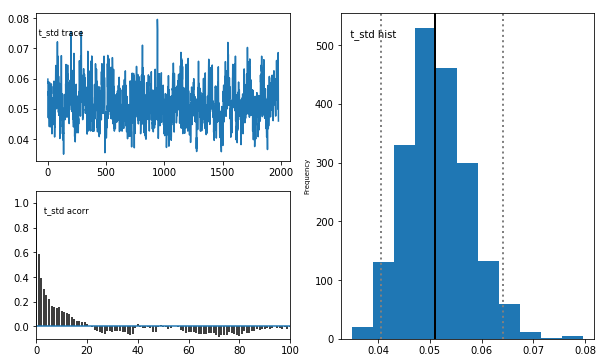

In [46]:
model_level_bias.plot_posteriors()

In [47]:
model_level_bias.print_stats()

                                         mean         std        2.5q        25q        50q        75q      97.5q       mc err
a                                     2.87637    0.168359     2.56306    2.76089    2.86976    2.98476    3.22248   0.00961439
a_std                                0.617902    0.126422    0.420188   0.529043   0.603687   0.690131   0.920788   0.00552408
a_subj.EMOCONPILOT001                 2.33065    0.184497     1.99283    2.20296    2.32072     2.4555    2.72399    0.0127598
a_subj.EMOCONPILOT003                  3.5016    0.264789     2.94622    3.33713    3.51934    3.68068    4.00032    0.0202097
a_subj.EMOCONPILOT004                 3.05233    0.276396     2.51564    2.85606    3.05928     3.2494    3.57239    0.0209941
a_subj.EMOCONPILOT005_120HZ           2.45044    0.207773     2.07443    2.29759    2.44778    2.58793    2.86041    0.0164015
a_subj.EMOCONPILOT006                 2.29279    0.159161     2.00109    2.18149    2.28796    2.39931    2.615

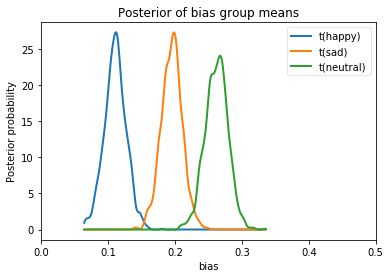

In [73]:
t_happy, t_sad, t_neutral = model_stim_bias.nodes_db.node[['t(happy)', 't(sad)', 't(neutral)']] 
hddm.analyze.plot_posterior_nodes([t_happy, t_sad, t_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means')
plt.xlim(0,0.5)


In [61]:
print "P(happy > sad)=",(t_happy.trace() > t_sad.trace()).mean()
print "P(sad > happy)=",(t_sad.trace() > t_happy.trace()).mean()
print "P(happy > neutral)=",(t_happy.trace() > t_neutral.trace()).mean()
print "P(sad > neutral)=",(t_sad.trace() > t_neutral.trace()).mean()

P(happy > sad)= 0.0
P(sad > happy)= 1.0
P(happy > neutral)= 0.0
P(sad > neutral)= 0.0


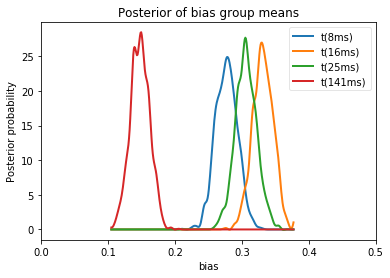

In [74]:
t_8ms, t_16ms, t_25ms, t_141ms = model_level_bias.nodes_db.node[['t(8ms)', 't(16ms)', 't(25ms)', 't(141ms)']] 
hddm.analyze.plot_posterior_nodes([t_8ms, t_16ms, t_25ms, t_141ms])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means')
plt.xlim(0,0.5)


In [63]:
print "P(8ms > 16ms)=",(t_8ms.trace() > t_16ms.trace()).mean()
print "P(8ms > 25ms)=",(t_8ms.trace() > t_25ms.trace()).mean()
print "P(8ms > 141ms)=",(t_8ms.trace() > t_141ms.trace()).mean()

print "P(16ms > 25ms)=",(t_16ms.trace() > t_25ms.trace()).mean()
print "P(16ms > 141ms)=",(t_16ms.trace() > t_141ms.trace()).mean()

print "P(25ms > 141ms)=",(t_25ms.trace() > t_141ms.trace()).mean()

P(8ms > 16ms)= 0.0015151515151515152
P(8ms > 25ms)= 0.06313131313131314
P(8ms > 141ms)= 1.0
P(16ms > 25ms)= 0.9257575757575758
P(16ms > 141ms)= 1.0
P(25ms > 141ms)= 1.0
